In [1]:
import numpy
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)
(x_img_train,y_label_train),(x_img_test, y_label_test)=cifar10.load_data()

Using TensorFlow backend.


In [2]:
print('train:',len(x_img_train))
print('test :',len(x_img_test))
print('train_image :',x_img_train.shape)
print('train_label :',y_label_train.shape)
print('test_image :',x_img_test.shape)
print('test_label :',y_label_test.shape)

train: 50000
test : 10000
train_image : (50000, 32, 32, 3)
train_label : (50000, 1)
test_image : (10000, 32, 32, 3)
test_label : (10000, 1)


In [3]:
print(x_img_test[0])

[[[158 112  49]
  [159 111  47]
  [165 116  51]
  ...
  [137  95  36]
  [126  91  36]
  [116  85  33]]

 [[152 112  51]
  [151 110  40]
  [159 114  45]
  ...
  [136  95  31]
  [125  91  32]
  [119  88  34]]

 [[151 110  47]
  [151 109  33]
  [158 111  36]
  ...
  [139  98  34]
  [130  95  34]
  [120  89  33]]

 ...

 [[ 68 124 177]
  [ 42 100 148]
  [ 31  88 137]
  ...
  [ 38  97 146]
  [ 13  64 108]
  [ 40  85 127]]

 [[ 61 116 168]
  [ 49 102 148]
  [ 35  85 132]
  ...
  [ 26  82 130]
  [ 29  82 126]
  [ 20  64 107]]

 [[ 54 107 160]
  [ 56 105 149]
  [ 45  89 132]
  ...
  [ 24  77 124]
  [ 34  84 129]
  [ 21  67 110]]]


#### 可视化部分训练集

In [22]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}
import matplotlib.pyplot as plt

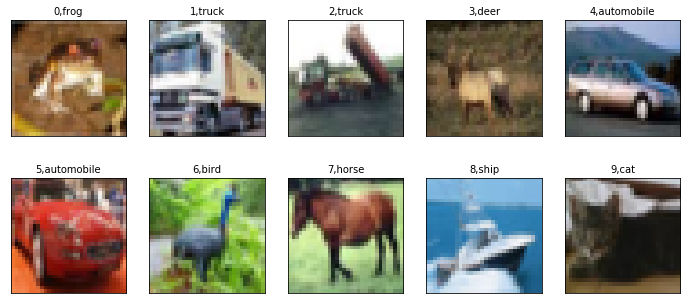

In [21]:
def plot_images_labels_prediction(images,labels,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14) # 控制图片大小
    if num>25: num=25  #最多显示25张
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
        title=str(i)+','+label_dict[labels[i][0]]# i-th张图片对应的类别
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);
        ax.set_yticks([])        
        idx+=1 
    plt.savefig('1.png')
    plt.show()
plot_images_labels_prediction(x_img_train,y_label_train,0)

In [35]:
label_dict[y_label_train[0][0]]

'frog'

#### image normalize 归一化

In [39]:
print(x_img_train[0][0][0])
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0
print(x_img_train_normalize[0][0][0])

[59 62 63]
[0.23137255 0.24313726 0.24705882]


#### one-hot Encoding

In [45]:
print(y_label_train.shape)
print(y_label_train[:5])

(50000, 1)
[[6]
 [9]
 [9]
 [4]
 [1]]


- kreas.utils.to_categorical() 将类型向量转换为二进制向量

In [47]:
from keras.utils import np_utils
y_label_train_onehot=np_utils.to_categorical(y_label_train)
y_label_test_onehot=np_utils.to_categorical(y_label_test)
print(y_label_train_onehot.shape)
print(y_label_train_onehot[:5])#

(50000, 10)
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


#### 建立模型

In [50]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))
model.add(Dropout(rate=0.25))
model.add(MaxPooling2D(pool_size=(2, 2))) # 16* 16 池化下采样降低特征维度
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2))) # 8 * 8 池化下采样降低特征维度
model.add(Flatten()) # FC1,64个8*8转化为1维向量
model.add(Dropout(rate=0.25))
model.add(Dense(1024, activation='relu')) # FC2 1024
model.add(Dropout(rate=0.25))
model.add(Dense(10, activation='softmax')) # Output 10
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_9 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_10 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)             

In [51]:
import os 
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]="0"  

In [53]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

train_history=model.fit(x_img_train_normalize, y_label_train_onehot,
                        validation_split=0.2,
                        epochs=10, batch_size=128, verbose=1)   

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 90s 2ms/step - loss: 1.5891 - accuracy: 0.4291 - val_loss: 1.3779 - val_accuracy: 0.5550
Epoch 2/10
40000/40000 [==============================] - 93s 2ms/step - loss: 1.2074 - accuracy: 0.5693 - val_loss: 1.2532 - val_accuracy: 0.5939
Epoch 3/10
40000/40000 [==============================] - 92s 2ms/step - loss: 1.0688 - accuracy: 0.6213 - val_loss: 1.0624 - val_accuracy: 0.6499
Epoch 4/10
40000/40000 [==============================] - 95s 2ms/step - loss: 0.9557 - accuracy: 0.6603 - val_loss: 1.0195 - val_accuracy: 0.6477
Epoch 5/10
40000/40000 [==============================] - 94s 2ms/step - loss: 0.8616 - accuracy: 0.6973 - val_loss: 0.9491 - val_accuracy: 0.6930
Epoch 6/10
40000/40000 [==============================] - 96s 2ms/step - loss: 0.7798 - accuracy: 0.7262 - val_loss: 0.8869 - val_accuracy: 0.6975
Epoch 7/10
40000/40000 [==============================] - 94s 2ms/st

In [60]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig("1.png")
    plt.show()

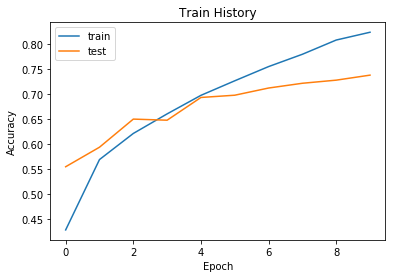

In [64]:
show_train_history('accuracy','val_accuracy')

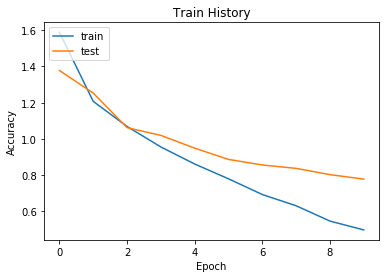

In [62]:
show_train_history('loss','val_loss')

In [67]:
print(model.metrics_names)
scores = model.evaluate(x_img_test_normalize, 
                        y_label_test_onehot, verbose=0)
print(scores)
print(scores[1])

['loss', 'accuracy']
[0.7912297713279725, 0.7271999716758728]
0.7271999716758728


In [68]:
prediction=model.predict_classes(x_img_test_normalize)
prediction[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=int64)

In [69]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

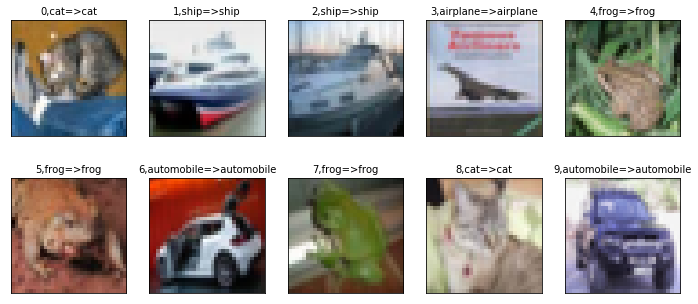

In [71]:
plot_images_labels_prediction(x_img_test,y_label_test,prediction,0,10)